In [1]:
from data_processing import open_data
import matplotlib.pyplot as plt
from PIL.Image import Transpose, Resampling

In [47]:
dataset = open_data('train')

In [48]:
xlist = []
ylist = []
scalelist = []

In [50]:
for data in dataset.data:
    x, y = data.size
    if x > y:
        data = data.transpose(Transpose.ROTATE_90)
        buf = x
        x = y
        y = buf
    xlist.append(x)
    ylist.append(y)
    scalelist.append(y/x)

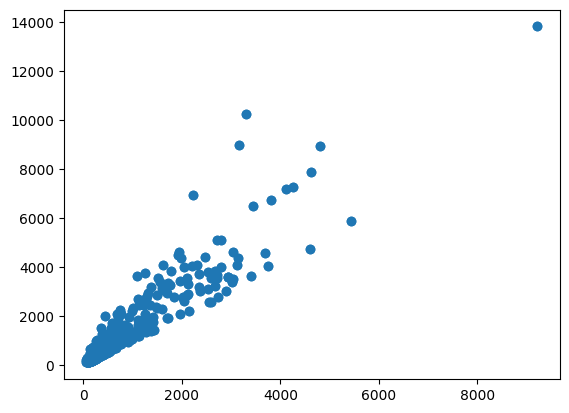

In [51]:
plt.scatter(xlist,ylist)
plt.show()

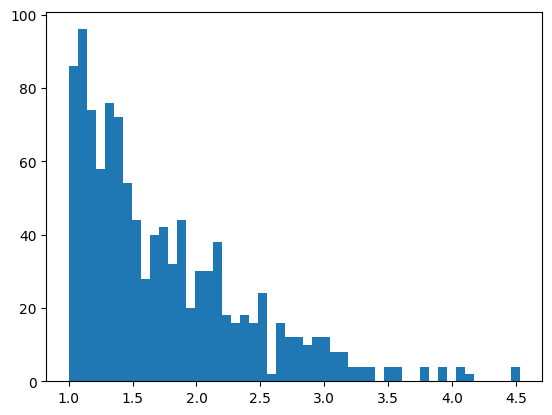

In [52]:
plt.hist(scalelist,bins=50)
plt.show()

In [53]:
scalelist.index(max(scalelist))

148

In [54]:
ylist.index(min(ylist)), min(ylist)

(207, 99)

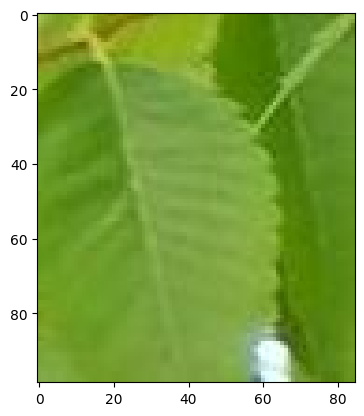

In [56]:
plt.imshow(dataset.data[207])
plt.show()

In [64]:
sum(scalelist)/len(scalelist), sum(xlist)/len(xlist) , (sum(xlist)/len(xlist))*(sum(scalelist)/len(scalelist))

(1.745413279530261, 669.4548802946593, 1168.4754381126397)

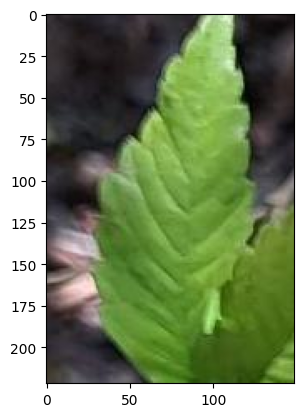

In [65]:
plt.imshow(dataset.data[52])
plt.show()

In [12]:
from RealESRGAN import RealESRGAN
import torch
from PIL import Image
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
model = RealESRGAN(device, scale=8)

In [14]:
model.load_weights('weights/RealESRGAN_x8.pth', download=True)

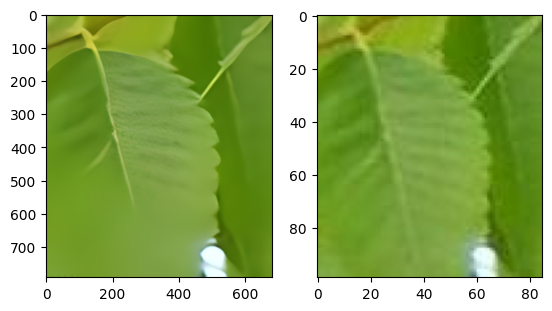

In [77]:
image = dataset.data[207].convert("RGB")
sr_image = model.predict(image)
plt.subplot(121)
plt.imshow(sr_image)
plt.subplot(122)
plt.imshow(image)
plt.show()

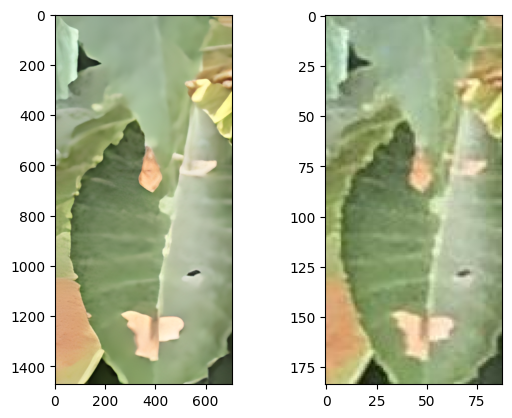

In [18]:
image = dataset.data[93].convert("RGB")
sr_image = model.predict(image)
plt.subplot(121)
plt.imshow(sr_image)
plt.subplot(122)
plt.imshow(image)
plt.show()

In [71]:
ylist.index(max(ylist))

523

In [72]:
ylist.index(min(ylist))

207

In [29]:
dataset.data[93] == dataset.data[93].convert("RGB")

False

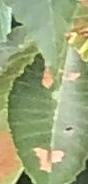

In [30]:
dataset.data[93].convert("RGB")

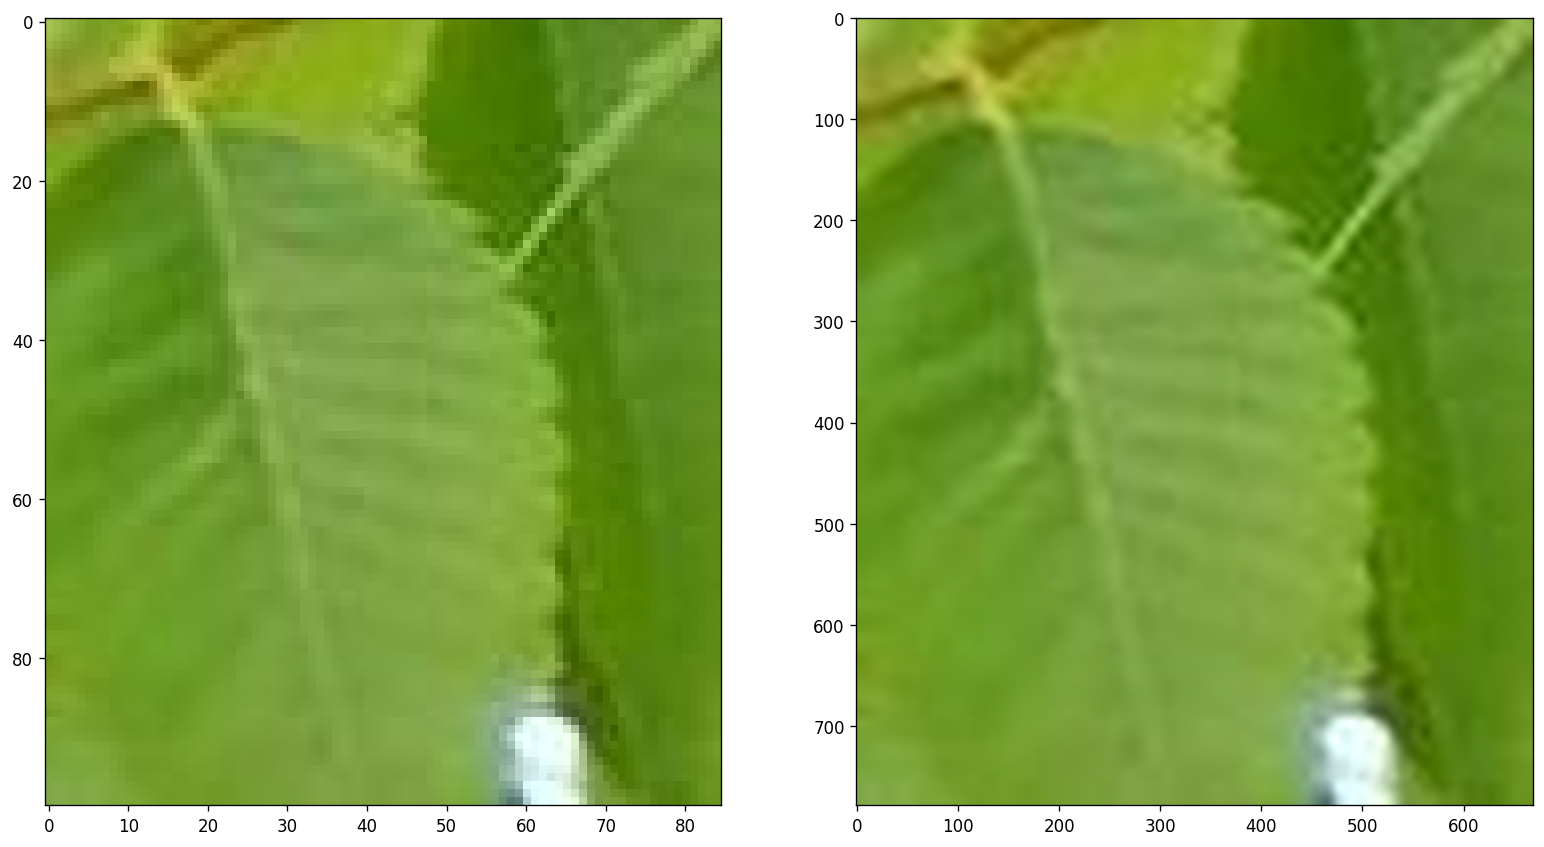

In [67]:
image = dataset.data[207]
plt.figure(dpi=120, figsize=(16,9))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image.resize((669, 779),Resampling.LANCZOS))
plt.show()

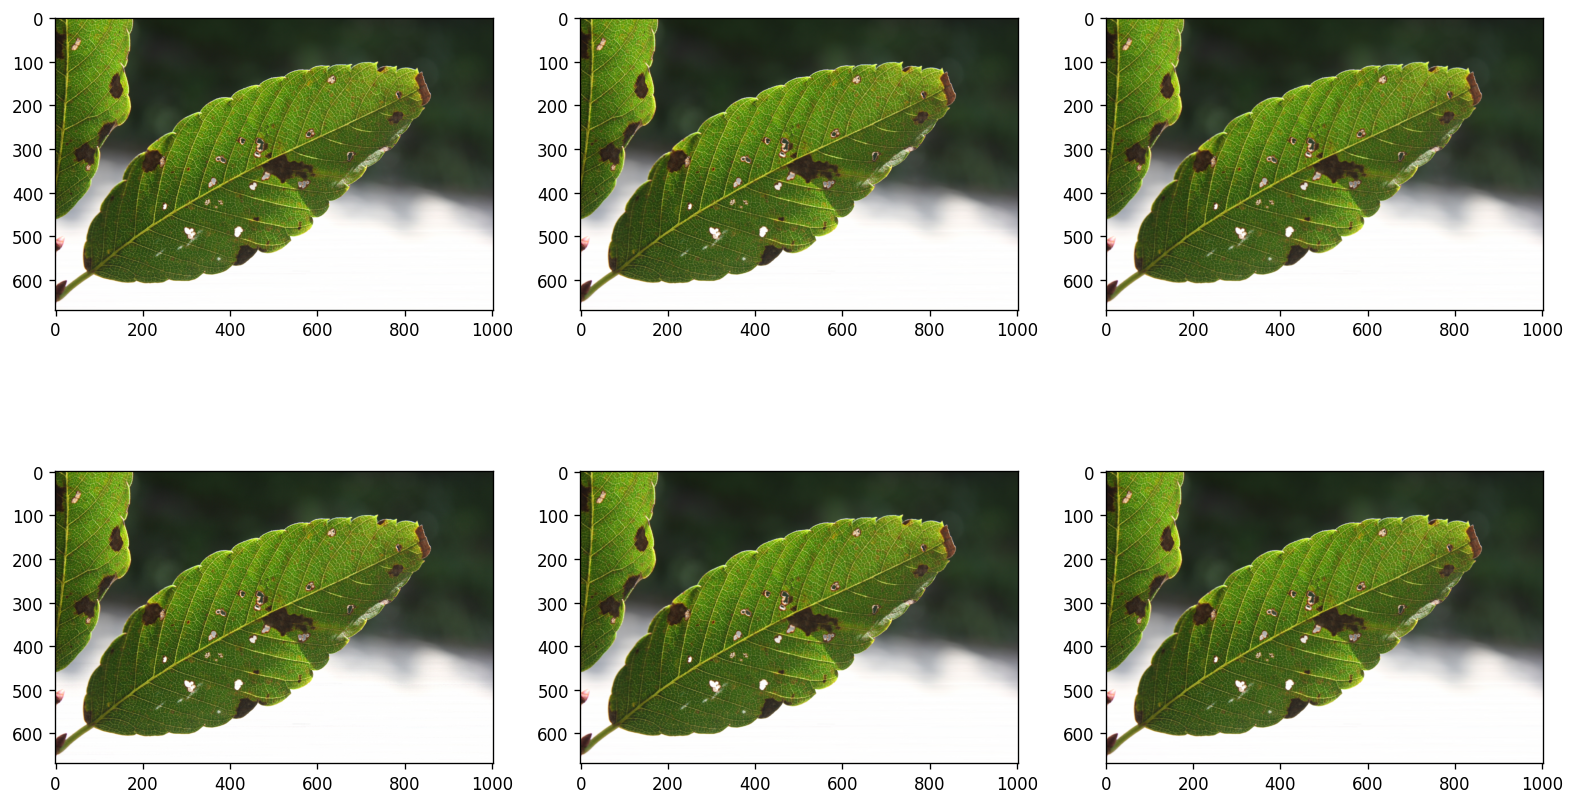

In [76]:
image = dataset.data[523]
plt.figure(dpi=120, figsize=(16,9))
plt.subplot(231)
plt.imshow(image.resize((1003, 669),Resampling.LANCZOS))
plt.subplot(232)
plt.imshow(image.resize((1003, 669),Resampling.BICUBIC))
plt.subplot(233)
plt.imshow(image.resize((1003, 669),Resampling.BILINEAR))
plt.subplot(234)
plt.imshow(image.resize((1003, 669),Resampling.NEAREST))
plt.subplot(235)
plt.imshow(image.resize((1003, 669),Resampling.BOX))
plt.subplot(236)
plt.imshow(image.resize((1003, 669),Resampling.HAMMING))
plt.show()

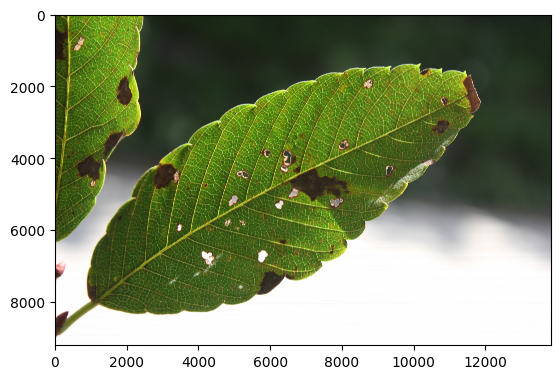

In [75]:
plt.imshow(image)
plt.show()

In [73]:
dataset.data[523].size

(13824, 9216)

In [1]:
from data_processing import load_data
import tqdm
trainloader, testloader = load_data(10)
image = 0
for inputs, targets in tqdm.tqdm(testloader):
    image = inputs[0]

100%|██████████| 14/14 [00:03<00:00,  3.85it/s]


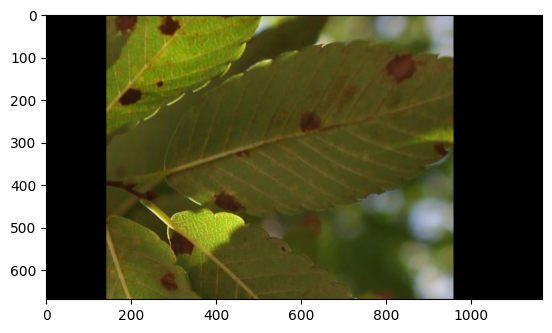

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

plt.imshow(T.ToPILImage()(image))